<a href="https://colab.research.google.com/github/Zahra2351373/Image-Processing-Tutorials/blob/Master/Tutorial_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
import cv2
from google.colab.patches import cv2_imshow
import os
print(cv2.__version__, cv2.__spec__)
#print(cv2.getBuildInformation())

4.1.2 ModuleSpec(name='cv2.cv2', loader=<_frozen_importlib_external.ExtensionFileLoader object at 0x7facc9411390>, origin='/usr/local/lib/python3.7/dist-packages/cv2/cv2.cpython-37m-x86_64-linux-gnu.so')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
#Second change your current folder to point working folder My Drive
os.chdir("/content/drive/My Drive/")
os.listdir()

['tr_im.nii.gz',
 'tr_mask.nii.gz',
 'val_im.nii.gz',
 'Colab Notebooks',
 'test-volume',
 'train-labels',
 'train-volume',
 'Dataset',
 'test-volume.zip',
 'train-labels.zip',
 'train-volume.zip',
 'images']

In [4]:
I = cv2.imread('./images/lenacolor256.png',0)
#I = cv2.imread('./images/mri.png',0)

In [5]:
#noise = np.random.normal(0,1,I.size)
#noise = noise.reshape(I.shape[0],I.shape[1]).astype('uint8')
#gauss = gauss.reshape(I.shape[0],I.shape[1],I.shape[2]).astype('uint8')
# Add the Gaussian noise to the image
#noisy = cv2.add(I,noise)
noisy = random_noise(I, mode='gaussian',var=0.01)

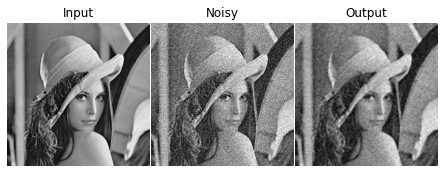

In [6]:
output = cv2.boxFilter(noisy,-1,(3,3))
# or use cv2.blur() as shown below
# output = cv2.blur(noisy,(3,3))
images = [I, noisy, output]
image_name = ['Input', 'Noisy', 'Output']
for i in range(3):
  plt.subplot(1,3,i+1),plt.imshow(images[i],cmap = 'gray')
  plt.title(image_name[i]), plt.axis('off')
  plt.tight_layout(.1)
plt.show()

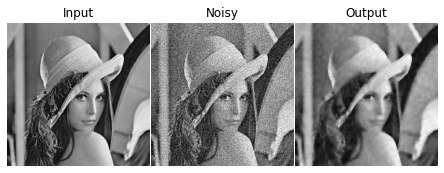

In [7]:
#Input: 8-bit or floating-point, 1-channel or 3-channel image.
noisy8 = np.asarray(255*noisy, dtype = 'uint8')
output = cv2.bilateralFilter(noisy8,9,75,75)
images = [I, noisy, output]
image_name = ['Input', 'Noisy', 'Output']
for i in range(3):
  plt.subplot(1,3,i+1),plt.imshow(images[i],cmap = 'gray')
  plt.title(image_name[i]), plt.axis('off')
  plt.tight_layout(.1)
plt.show()

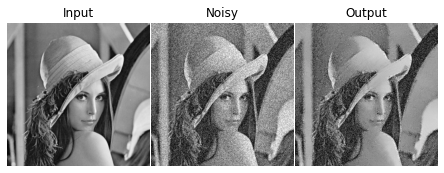

In [8]:
noisy_img=cv2.cvtColor(noisy8, cv2.COLOR_GRAY2BGR)
output = cv2.fastNlMeansDenoisingColored(noisy_img,None,10,10,7,21)
images = [I, noisy, output]
image_name = ['Input', 'Noisy', 'Output']
for i in range(3):
  plt.subplot(1,3,i+1),plt.imshow(images[i],cmap = 'gray')
  plt.title(image_name[i]), plt.axis('off')
  plt.tight_layout(.1)
plt.show()

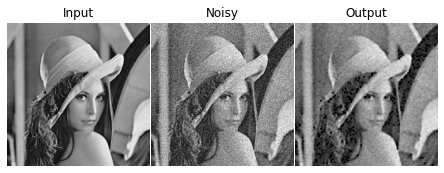

In [9]:
rows, cols = I.shape
ksize = 3
padsize = int((ksize-1)/2)
pad_img = cv2.copyMakeBorder(noisy, *[padsize]*4, cv2.BORDER_DEFAULT)
J = np.zeros_like(I)
for r in range(rows):
  for c in range(cols):
    W = pad_img[r:r+ksize, c:c+ksize]*255
    J[r, c] = np.prod(W)**(1/(ksize**2))
output = np.uint8(J)
# output = geometric_mean(noisy, disk(3))
#Other simple form
#output = np.uint8(np.exp(cv2.boxFilter(np.log(noisy),-1, (3,3))))
images = [I, noisy, output]
image_name = ['Input', 'Noisy', 'Output']
for i in range(3):
  plt.subplot(1,3,i+1),plt.imshow(images[i],cmap = 'gray')
  plt.title(image_name[i]), plt.axis('off')
  plt.tight_layout(.1)
plt.show()

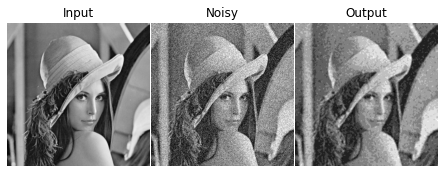

In [10]:
rows, cols = I.shape
ksize = 3
D = 4 #range from 0 to (ksize*2 − 1)/2.
padsize = int((ksize-1)/2)
pad_img = cv2.copyMakeBorder(noisy, *[padsize]*4, cv2.BORDER_DEFAULT)
J = np.zeros_like(I)
for r in range(rows):
  for c in range(cols):
    W = pad_img[r:r+ksize, c:c+ksize]
    J[r, c] = np.sum(W)/(ksize**2 - 2*D)
output = np.uint8(J)
images = [I, noisy, output]
image_name = ['Input', 'Noisy', 'Output']
for i in range(3):
  plt.subplot(1,3,i+1),plt.imshow(images[i],cmap = 'gray')
  plt.title(image_name[i]), plt.axis('off')
  plt.tight_layout(.1)
plt.show()

In [11]:
noisy = random_noise(I, mode='s&p',amount=0.05)
# The above function returns a floating-point image on the range [0, 1],
# thus we changed it to 'uint8' and from [0,255]
noisy = np.array(255*noisy, dtype = 'uint8')

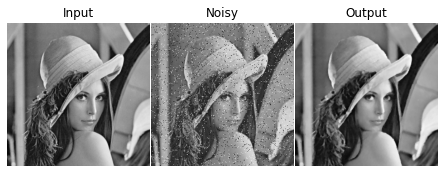

In [14]:
output = cv2.medianBlur(noisy,3)
images = [I, noisy, output]
image_name = ['Input', 'Noisy', 'Output']
for i in range(3):
  plt.subplot(1,3,i+1),plt.imshow(images[i],cmap = 'gray')
  plt.title(image_name[i]), plt.axis('off')
  plt.tight_layout(.1)
plt.show()

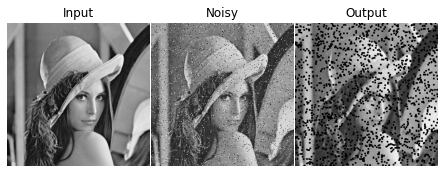

In [16]:
epsilon = np.finfo(float).eps
rows, cols = I.shape
ksize = 3
padsize = int((ksize-1)/2)
pad_img = cv2.copyMakeBorder(np.double(noisy), *[padsize]*4, cv2.BORDER_DEFAULT)
J = np.zeros_like(I)
for r in range(rows):
  for c in range(cols):
    W = pad_img[r:r+ksize, c:c+ksize]
    J[r, c] = (ksize**2)/np.sum(1/(W + epsilon))
output = np.uint8(J)
images = [I, noisy, output]
image_name = ['Input', 'Noisy', 'Output']
for i in range(3):
  plt.subplot(1,3,i+1),plt.imshow(images[i],cmap = 'gray')
  plt.title(image_name[i]), plt.axis('off')
  plt.tight_layout(.1)
plt.show()

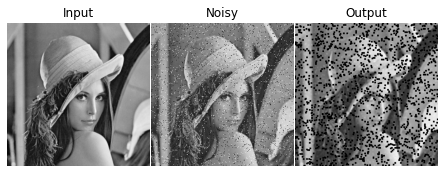

In [18]:
rows, cols = I.shape
ksize = 3
Q = -0.5
padsize = int((ksize-1)/2)
pad_img = cv2.copyMakeBorder(np.double(noisy), *[padsize]*4, cv2.BORDER_DEFAULT)
J = np.zeros_like(I)
for r in range(rows):
  for c in range(cols):
    W = pad_img[r:r+ksize, c:c+ksize]
    J[r, c] = np.sum(W**(Q+1))/np.sum((W + epsilon)**Q)
output = np.uint8(J)
images = [I, noisy, output]
image_name = ['Input', 'Noisy', 'Output']
for i in range(3):
  plt.subplot(1,3,i+1),plt.imshow(images[i],cmap = 'gray')
  plt.title(image_name[i]), plt.axis('off')
  plt.tight_layout(.1)
plt.show()

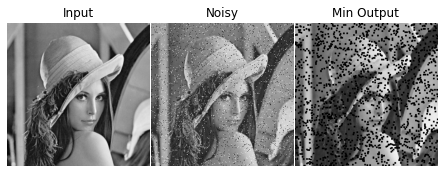

In [20]:
rows, cols = I.shape
ksize = 3
padsize = int((ksize-1)/2)
pad_img = cv2.copyMakeBorder(np.double(noisy), *[padsize]*4, cv2.BORDER_DEFAULT)
J = np.zeros_like(I)
for r in range(rows):
  for c in range(cols):
    W = pad_img[r:r+ksize, c:c+ksize]
    J[r, c] = np.min(W)
output = np.uint8(J)
images = [I, noisy, output]
image_name = ['Input', 'Noisy', 'Min Output']
for i in range(3):
  plt.subplot(1,3,i+1),plt.imshow(images[i],cmap = 'gray')
  plt.title(image_name[i]), plt.axis('off')
  plt.tight_layout(.1)
plt.show()

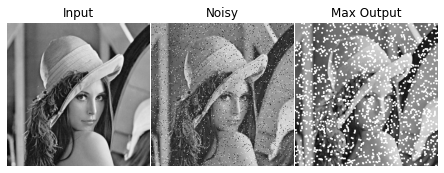

In [21]:
rows, cols = I.shape
ksize = 3
padsize = int((ksize-1)/2)
pad_img = cv2.copyMakeBorder(np.double(noisy), *[padsize]*4, cv2.BORDER_DEFAULT)
J = np.zeros_like(I)
for r in range(rows):
  for c in range(cols):
    W = pad_img[r:r+ksize, c:c+ksize]
    J[r, c] = np.max(W)
output = np.uint8(J)
images = [I, noisy, output]
image_name = ['Input', 'Noisy', 'Max Output']
for i in range(3):
  plt.subplot(1,3,i+1),plt.imshow(images[i],cmap = 'gray')
  plt.title(image_name[i]), plt.axis('off')
  plt.tight_layout(.1)
plt.show()

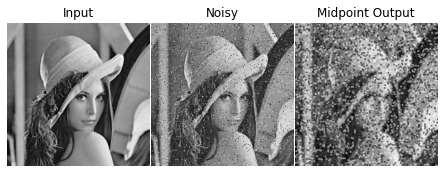

In [22]:
rows, cols = I.shape
ksize = 3
padsize = int((ksize-1)/2)
pad_img = cv2.copyMakeBorder(np.double(noisy), *[padsize]*4, cv2.BORDER_DEFAULT)
J = np.zeros_like(I)
for r in range(rows):
  for c in range(cols):
    W = pad_img[r:r+ksize, c:c+ksize]
    J[r, c] = (np.min(W)+np.max(W))/2
output = np.uint8(J)
images = [I, noisy, output]
image_name = ['Input', 'Noisy', 'Midpoint Output']
for i in range(3):
  plt.subplot(1,3,i+1),plt.imshow(images[i],cmap = 'gray')
  plt.title(image_name[i]), plt.axis('off')
  plt.tight_layout(.1)
plt.show()

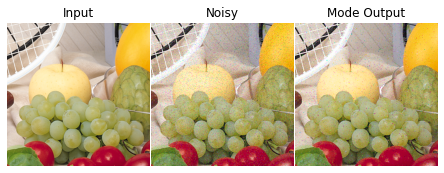

In [23]:
from PIL import Image, ImageFilter
I = Image.open("./images/fruits.png")
noisy = random_noise(np.asarray(I), mode='s&p',amount=0.05)
noisy = Image.fromarray(np.asarray(255*noisy, dtype = 'uint8'))
output = noisy.filter(ImageFilter.ModeFilter(size = 3))
images = [I, noisy, output]
image_name = ['Input', 'Noisy', 'Mode Output']
for i in range(3):
  plt.subplot(1,3,i+1),plt.imshow(images[i],cmap = 'gray')
  plt.title(image_name[i]), plt.axis('off')
  plt.tight_layout(.1)
plt.show()

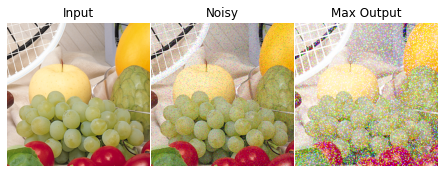

In [24]:
output = noisy.filter(ImageFilter.MaxFilter(size = 3))
#output = noisy.filter(ImageFilter.MinFilter(size = 3))
images = [I, noisy, output]
image_name = ['Input', 'Noisy', 'Max Output']
for i in range(3):
  plt.subplot(1,3,i+1),plt.imshow(images[i],cmap = 'gray')
  plt.title(image_name[i]), plt.axis('off')
  plt.tight_layout(.1)
plt.show()

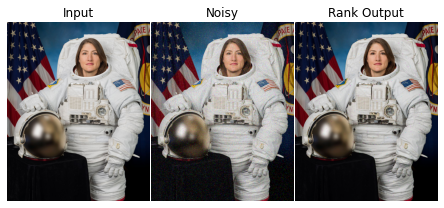

In [25]:
I = Image.open("./images/christina.jpg")
noisy = random_noise(np.asarray(I), mode='s&p',amount=0.05)
noisy = Image.fromarray(np.asarray(255*noisy, dtype = 'uint8'))
output = noisy.filter(ImageFilter.RankFilter(size = 3, rank = 2))
images = [I, noisy, output]
image_name = ['Input', 'Noisy', 'Rank Output']
for i in range(3):
  plt.subplot(1,3,i+1),plt.imshow(images[i],cmap = 'gray')
  plt.title(image_name[i]), plt.axis('off')
  plt.tight_layout(.1)
plt.show()